In [1]:
import pandas as pd
import numpy as np
from src.utils.config import *
from src.utils.util import *


from src.utils.generate_obstacle_data import *
from src.utils.generate_boundary_condition import *

## custom boundary data 생성

- 입/출구는 나중에 반영하면될거같고 장애물공간있는 3차원배열만 만들면될거같은데

In [6]:
obstacle_data = {
    # 시뮬레이션 고정값
    "x_dim":120,
    "y_dim":60,
    "z_dim":64,
    "x_max":5,
    "y_max":2.5,
    "z_max":2.7,

    # 장애물 개수 설정
    "obs_count":3,

    # 장애물 위치바꾸는 부분 
    # 테이블기본 : 1,2.5,0,1,0,1.2
    # 소파기본 : (1) 1,3,1.85,2.5,0,0.3 
    #            (2) 1,3,2.35,2.5,0.3,0.8
    "obs_x_min":[1, 1, 1], 
    "obs_x_max":[2.5, 3, 3],
    "obs_y_min":[0, 1.85, 2.35],
    "obs_y_max":[1, 2.5, 2.5],
    "obs_z_min":[0, 0, 0.3],
    "obs_z_max":[1.2, 0.3, 0.8],

    # 입구/출구 좌표값
    "input_pos": [0.3798,0.4548,0,0.466,2.7,2.7],
    "output_pos": [0.044,0.1898,0,0.466,2.7,2.7],
}

In [7]:
obstacle_config = get_obstacle_config(obstacle_data)
obstacle_df = make_null_dataframe(obstacle_config)
obstacle_arr = generate_obstacle_data(obstacle_config)

In [8]:
len(obstacle_arr)

3

In [40]:
obstacle_arr = obstacle_arr[0] * obstacle_arr[1]

In [41]:
obstacle_df["value"]=obstacle_arr
obstacle_df = make_bdr(obstacle_df,obstacle_config.input_pos,obstacle_config.output_pos)
obstacle_df["value"] = obstacle_df["value"] * obstacle_df["Boundary"]

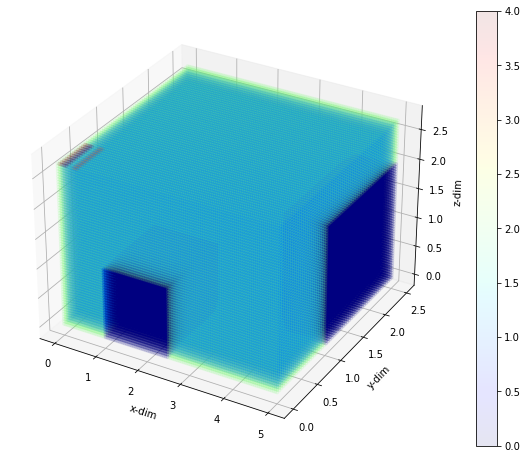

In [42]:
plotting(obstacle_df,obstacle_df["value"],[12,8,10,0.1,0,4,30,300])